In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet

% matplotlib inline

In [36]:
df = pd.read_csv('example_data.csv')
df['ds'] = pd.to_datetime(df['ds'],format='%Y-%m-%d')

In [38]:
df.head()

,ds,y
0,2015-01-26,23
1,2015-02-02,26
2,2015-02-09,14
3,2015-02-16,15
4,2015-02-23,19


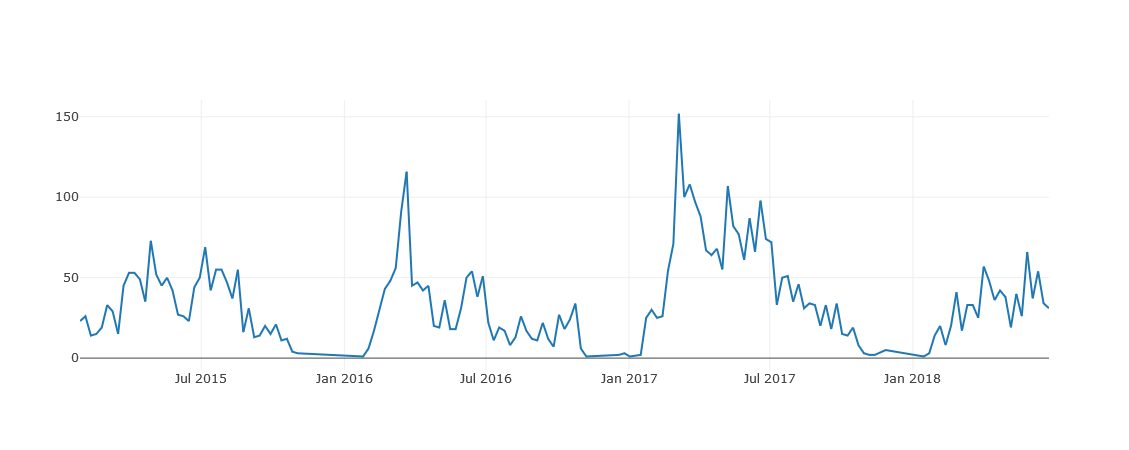

In [39]:
tc_df = go.Scatter(x=df.ds.dt.date , y=df.y,name='actuals')
iplot([tc_df])

In [40]:
df_train = df[df['ds']<'2018-03-31']
df_test = df[df['ds']>='2018-03-31']

In [41]:
m=Prophet()
m.fit(df_train)
future = m.make_future_dataframe(15,freq='W-MON')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Convrgytics\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [42]:
results = pd.merge(df_test,forecast[['ds','yhat']],how='left',on=['ds'])
results['mape'] = 100*abs(results['y']-results['yhat'])/results['y']

In [43]:
results.head()

,ds,y,yhat,mape
0,2018-04-02,57,66.213766,16.164501
1,2018-04-09,48,61.486397,28.096660
2,2018-04-16,36,57.013087,58.369686
3,2018-04-23,42,55.301411,31.670027
4,2018-04-30,38,57.319624,50.841117


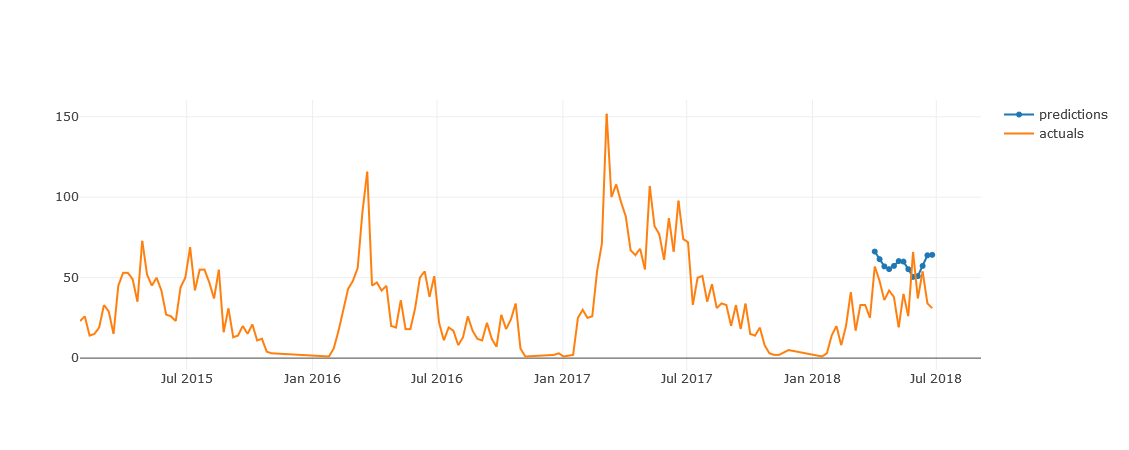

In [44]:
tc_preds = go.Scatter(x=results.ds.dt.date  , y=results.yhat.values,name='predictions')
iplot([tc_preds,tc_df])

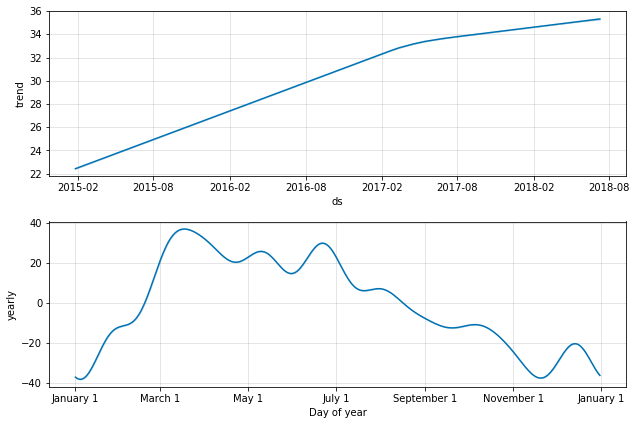

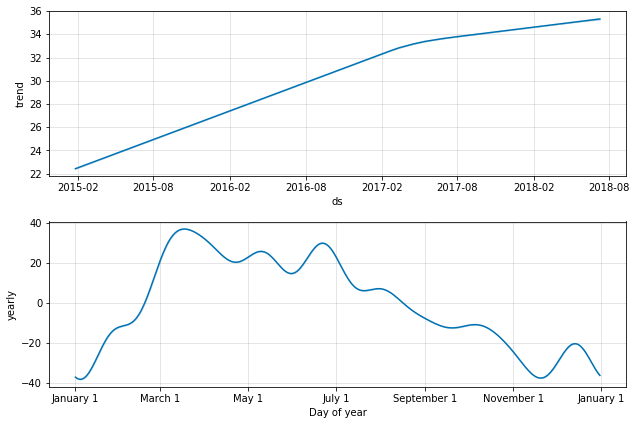

In [45]:
m.plot_components(forecast)

In [46]:
results.mape.mean()

63.658923632830245